In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

from torch.utils.tensorboard import SummaryWriter

import sklearn
import functools
import operator

import sys

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

import lat_dataset_load_new
import aenc_torch_net_class
import torch_net_class
import utils

from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")
    

Utilizing CUDA


In [3]:
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True

In [4]:
"""
Load Data
"""
#conf_file_dir = "/media/data/sbulusu/datasets/kl_config/"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"
#file_format = "*.dat"
#file_format_list = ["*1.170*.dat", "*0.910*.dat"]
file_format_list = ["configs*.dat"]
lat_size = [10,200]
dim = len(lat_size)
conf_size = np.concatenate(([2],[dim],lat_size))
print(conf_size)
output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))
print(output_size)

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase"]

dataset = lat_dataset_load_new.kl_dataset(conf_file_dir, file_format_list, conf_size, output_size, label_names, labels_in_file_name, transform="default", device=device)

[  2   2  10 200]
[  4  10 200]
[ -1   2   2  10 200]


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.925.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.975.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 10, 200])



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-200-10-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 10, 200])




last example loaded:
{'conf': tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  1,  1,  1],
          ...,
          [ 0,  1,  1,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  0,  0,  0]],

         [[-1,  0,  0,  ...,  0,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0, -1,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ..., -1,  0,  0],
          [-1,  0,  0,  ...,  0,  0,  0]]],


        [[[ 0,  0,  0,  ...,  0,  0,  1],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 0,  0,

In [5]:
#target_attributes = ["mu"]
#output_attributes = ["mu"]
#target_attributes = ["n"]
#output_attributes = ["n"]
#target_attributes = ["phi2"]
#output_attributes = ["phi2"]
#target_attributes = ["phase"]
#output_attributes = ["order","disorder"]
#output_attributes = ["phase_p"]

target_attributes = ["phi2", "n"]
output_attributes = target_attributes

#dataset.train_label_names = ["phase"]
#dataset.train_label_names = ["n"]
#dataset.train_label_names = ["phi2"]

dataset.train_label_names = target_attributes

In [6]:
sample_conf, sample_label = dataset.get_conf(0)
print(sample_conf.shape)

torch.Size([2, 2, 10, 200])


tensor([0.2900, 0.1000], dtype=torch.float64)


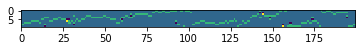

In [7]:
k_lat_links = sample_conf[0]
l_lat_links = sample_conf[1]
plt.imshow(k_lat_links[0])

print(sample_label)

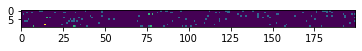

In [8]:
plt.imshow(l_lat_links[0])

In [9]:
"""Take specific example indices with particular labels"""

filter_label_names = ["mu"]
label_values = [[0.910, 1.050]]

filtered_train_indices, remaining_indices = dataset.filter_indices_label_vals(filter_label_names, label_values, remove=False)

Filtering indices with respect to labels ['mu'], remove = False


In [10]:
train_indices = filtered_train_indices

In [11]:
val_test_ratio = [0.2,0.8]
val_indices, test_indices = utils.split_shuffle_indices(remaining_indices, fractions=val_test_ratio, shuffle=True, random_seed=random_seed, log_file=None)

splitting into fraction [0.2, 0.8]
number of indices: 108000
slicing from 0 to 21600
slicing from 21600 to 108000


In [12]:
"""Manually set network structure"""
"""
    This list can be loaded into the constructor of the Net neural network class, to automatically generate the network structure
    type = pointer to the layer function'
    layer_pars = parameters which must be given to the layer function in order to initialize it
    act_func = activation function to be applied directly after feeding to the corresponding layer
    dropout = certain neurons cna be dropped out if specified
"""

fixed_net_struct = []
input_size = dataset.get_input_size()
print(f"input size {input_size}")
target_size = len(target_attributes)
print(f"target size {target_size}")
#output_size = target_size
output_size = len(output_attributes)
output_size = output_size

"""
##first try
i0 = input_size[0]
#[ [[in_channels, out_channels], [kernel_size], [stride], padding], ... ]
kernel_pars = [
    [[i0,16],[3,9],[1,1],0],
    [[16,16],[1,4],[1,4],0],
    [[16,32],[3,13],[1,1],0],
    [[32,32],[1,4],[1,4],0], 
    [[32,64],[3,4],[1,1],0]
]

#fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
for i, kernel_par in enumerate(kernel_pars):
    if i%2 == 0:
        layer_type = nn.Conv2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
        fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
    else:
        #layer_type = nn.MaxPool2d
        layer_type = nn.AvgPool2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3]}} )
        
"""

i0 = input_size[0]
#[ [[in_channels, out_channels], [kernel_size], [stride], padding], ... ]
kernel_pars = [
    [[i0,4],[3,9],[1,1],0],
    [[4,4],[1,4],[1,4],0],
    [[4,8],[3,13],[1,1],0],
    [[8,8],[1,4],[1,4],0], 
    [[8,16],[3,4],[1,1],0],
    [[16,16],[2,2],[2,2],0],
    [[16,16],[2,3],[1,1],0]
]

#fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
for i, kernel_par in enumerate(kernel_pars):
    if i%2 == 0:
        layer_type = nn.Conv2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
        #fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
        fixed_net_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
    else:
        #layer_type = nn.MaxPool2d
        layer_type = nn.AvgPool2d
        fixed_net_struct.append( {"type": layer_type, "layer_pars": {"kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3]}} )
        
conv_sizes = utils.calc_layer_sizes(input_size, fixed_net_struct)
print(conv_sizes)

input size [  4  10 200]
target size 2
0
<class 'torch.nn.modules.conv.Conv2d'>
[3, 9]
last layer [  4  10 200]
new layer [8]
last layer [  4  10 200]
new layer [8, 192]
1
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size
2
<class 'torch.nn.modules.pooling.AvgPool2d'>
[1, 4]
last layer [4, 8, 192]
new layer [8]
last layer [4, 8, 192]
new layer [8, 48]
3
<class 'torch.nn.modules.conv.Conv2d'>
[3, 13]
last layer [4, 8, 48]
new layer [6]
last layer [4, 8, 48]
new layer [6, 36]
4
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size
5
<class 'torch.nn.modules.pooling.AvgPool2d'>
[1, 4]
last layer [8, 6, 36]
new layer [6]
last layer [8, 6, 36]
new layer [6, 9]
6
<class 'torch.nn.modules.conv.Conv2d'>
[3, 4]
last layer [8, 6, 9]
new layer [4]
last layer [8, 6, 9]
new layer [4, 6]
7
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous laye

In [13]:
fc_input_size = np.product(conv_sizes[-1])


fixed_net_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
#fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.1 }} )
#fixed_net_struct.append( {"type": nn.BatchNorm1d, "layer_pars": {"num_features": fc_input_size}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": fc_input_size//2}} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": fc_input_size//4}} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features": output_size}} )
#fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.1 }} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": fc_input_size//4}} )
#fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
#fixed_net_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#fixed_net_struct.append( {"type": nn.Dropout, "layer_pars": {"p": 0.1 }} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//2, "out_features": output_size}} )
#fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size//4, "out_features": output_size}} )
#fixed_net_struct.append( {"type": nn.Softmax, "layer_pars": {"dim": 1}} )
#dim 0 or 1???
#fixed_net_struct.append( {"type": nn.ConvTranspose2d, "layer_pars": {"in_channels": 1, "out_channels": 1, "kernel_size": [1,1], "stride": 1, "padding": 1, "bias": True}, "act_func": act_func} )



"""
act_func = torch.prelu

fixed_net_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": int(np.prod(input_size)), "out_features": 2000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 2000, "out_features": 2000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 2000, "out_features": 1000}} )
fixed_net_struct.append( {"type": nn.PReLU, "layer_pars": {}} )
fixed_net_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 1000, "out_features": output_size}} )

"""

layer_sizes = utils.calc_layer_sizes(input_size, fixed_net_struct)
print(layer_sizes)

0
<class 'torch.nn.modules.conv.Conv2d'>
[3, 9]
last layer [  4  10 200]
new layer [8]
last layer [  4  10 200]
new layer [8, 192]
1
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size
2
<class 'torch.nn.modules.pooling.AvgPool2d'>
[1, 4]
last layer [4, 8, 192]
new layer [8]
last layer [4, 8, 192]
new layer [8, 48]
3
<class 'torch.nn.modules.conv.Conv2d'>
[3, 13]
last layer [4, 8, 48]
new layer [6]
last layer [4, 8, 48]
new layer [6, 36]
4
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size
5
<class 'torch.nn.modules.pooling.AvgPool2d'>
[1, 4]
last layer [8, 6, 36]
new layer [6]
last layer [8, 6, 36]
new layer [6, 9]
6
<class 'torch.nn.modules.conv.Conv2d'>
[3, 4]
last layer [8, 6, 9]
new layer [4]
last layer [8, 6, 9]
new layer [4, 6]
7
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size
8
<class 'torch.nn.modules.pooli

In [14]:
"""
HYPERPARAMETERS
"""

#val_epochs = [5,10,20,30]
#val_epochs = [1,2,3,4,5]
#val_epochs = list(range(0,10))
#val_epochs = list(range(0,100))
val_epochs = list(range(0,200))
#val_epochs = list(range(0,30))
#save_state_epochs = [10000]
#save_state_epochs = [1,2,3,4,5]
save_state_epochs = val_epochs[::5]

"""create list of parameters manually"""

hyper_parameters = {}
hyper_parameters["random_seed"] = random_seed
hyper_parameters["val_epochs"] = val_epochs
hyper_parameters["save_state_epochs"] = save_state_epochs

#hyper_parameters["loss_func"] = nn.CrossEntropyLoss
#hyper_parameters["loss_func"] = nn.BCELoss
hyper_parameters["loss_func"] = nn.MSELoss
hyper_parameters["optimizer"] = optim.Adam

hyper_parameters["batch_size"] = 10 
hyper_parameters["lr"] = 0.00001

hyper_parameters["net_struct"] = fixed_net_struct

hyper_parameters["val_method"] = "holdout"
hyper_parameters["val_method_pars"] = {"train" : 0.7, "val" : 0.1, "test" : 0.2}
#hyper_parameters["val_method"] = "k_fold"
#hyper_parameters["val_method_pars"] = 5

In [15]:
random_seed = hyper_parameters["random_seed"]
val_epochs = hyper_parameters["val_epochs"]
save_state_epochs = hyper_parameters["save_state_epochs"]

loss_func = hyper_parameters["loss_func"]()
optimizer_type = hyper_parameters["optimizer"]

batch_size = hyper_parameters["batch_size"]
lr=hyper_parameters["lr"]

net_struct = hyper_parameters["net_struct"]

val_method = hyper_parameters["val_method"]
val_method_pars = hyper_parameters["val_method_pars"]

val_pred_paths = []
val_label_paths = []


epochs = max(val_epochs)+1
train_loss = np.zeros(epochs)
val_loss = np.zeros(len(val_epochs))

net_state_paths = []

#create training log
log_file_name = "log.txt"
log_file = open(log_file_name, "w")
for layer_struct in fixed_net_struct:
    log_file.write(str(layer_struct))
    log_file.write("\n")
log_file.write("\n")
log_file.write(str(layer_sizes))
log_file.write("\n")
for key in hyper_parameters:
    log_file.write(key + ": " + str(hyper_parameters[key]))
    log_file.write("\n")

In [16]:
#tb = SummaryWriter()

net = torch_net_class.Net(net_struct, input_size=dataset.get_input_size(), output_size=[output_size])    
net.init_weights(torch.nn.init.xavier_normal_)
net.set_batch_size(batch_size)
#net.set_layer_sizes(layer_sizes)
net.to(device)
#net.show_layers()
net_parameters = net.parameters()

optimizer = optimizer_type(net_parameters, lr=lr)

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 4, 'out_channels': 4, 'kernel_size': [3, 9], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch.nn.modules.activation.ReLU'>, 'layer_pars': {}}

Adding {'type': <class 'torch.nn.modules.pooling.AvgPool2d'>, 'layer_pars': {'kernel_size': [1, 4], 'stride': [1, 4], 'padding': 0}}

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 4, 'out_channels': 8, 'kernel_size': [3, 13], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch.nn.modules.activation.ReLU'>, 'layer_pars': {}}

Adding {'type': <class 'torch.nn.modules.pooling.AvgPool2d'>, 'layer_pars': {'kernel_size': [1, 4], 'stride': [1, 4], 'padding': 0}}

Adding {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 8, 'out_channels': 16, 'kernel_size': [3, 4], 'stride': [1, 1], 'padding': 0, 'bias': True}}

Adding {'type': <class 'torch.nn.mo

In [17]:
net

Net(
  (layers): ModuleList(
    (0): Conv2d(4, 4, kernel_size=[3, 9], stride=[1, 1])
    (1): ReLU()
    (2): AvgPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0)
    (3): Conv2d(4, 8, kernel_size=[3, 13], stride=[1, 1])
    (4): ReLU()
    (5): AvgPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0)
    (6): Conv2d(8, 16, kernel_size=[3, 4], stride=[1, 1])
    (7): ReLU()
    (8): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
    (9): Conv2d(16, 16, kernel_size=[2, 3], stride=[1, 1])
    (10): ReLU()
    (11): Flatten()
    (12): Linear(in_features=16, out_features=8, bias=True)
    (13): ReLU()
    (14): Linear(in_features=8, out_features=2, bias=True)
  )
)

In [18]:
sum(p.numel() for p in net.parameters() if p.requires_grad)

4950

In [19]:
from torchviz import make_dot



In [20]:
"""regular training with all data"""
"""
split_indices = utils.load_split_indices(dataset=dataset, batch_size=batch_size, method=val_method, method_pars=val_method_pars, shuffle=True, random_seed=random_seed, log_file=log_file)

train_indices = split_indices[0][0]
val_indices = split_indices[0][1]
test_indices = split_indices[0][2]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)
"""

'\nsplit_indices = utils.load_split_indices(dataset=dataset, batch_size=batch_size, method=val_method, method_pars=val_method_pars, shuffle=True, random_seed=random_seed, log_file=log_file)\n\ntrain_indices = split_indices[0][0]\nval_indices = split_indices[0][1]\ntest_indices = split_indices[0][2]\n\ntrain_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)\nval_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)\n\ntrain_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)\nval_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)\n'

In [21]:
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)

In [22]:
val_dir = "val/"
try:
    os.makedirs(val_dir)
except FileExistsError:
    pass
train_state_dir = "net_states/"
try:
    os.makedirs(train_state_dir)
except FileExistsError:
    pass

epoch = 0
val_i = 0
for epoch in tqdm(range(epochs)):
    
    batch_nr = 0
    epoch_loss = np.zeros(len(train_loader))
    
    """Actual training step"""
    for train_mini_batch in tqdm(train_loader):
        batch_loss, train_output = utils.step(net, train_mini_batch[0], train_mini_batch[1], loss_func, optimizer, device, mode="train", log_file=log_file)
        epoch_loss[batch_nr] = batch_loss.item()
        batch_nr += 1
    mean_epoch_loss = epoch_loss.mean()
    train_loss[epoch] = mean_epoch_loss
    print(f"mean epoch {epoch} train loss: {mean_epoch_loss}\n")
    
    
    """save the neural networks state"""
    if epoch in save_state_epochs:
        train_state_epoch_file_path = train_state_dir + f"state_epoch_{epoch}"
        #train_state = {"epoch" : epoch, "state_dict": net.state_dict(), "optimizer": optimizer.state_dict()}
        #torch.save(train_state, train_state_epoch_file_path)
        torch.save(net.state_dict(), train_state_epoch_file_path)
        net_state_paths.append(train_state_epoch_file_path)
        print(f"saved model from epoch {epoch}")
        
    """
    Validation
    """
    if epoch in val_epochs:
        val_label = []
        val_pred = []
        
        val_batch_nr = 0
        val_epoch_loss = np.zeros(len(val_loader))
        
        for val_mini_batch in tqdm(val_loader):
            label_batch = val_mini_batch[1]
            val_label.append(label_batch.detach().cpu().numpy())
            val_batch_loss, val_output = utils.step(net, val_mini_batch[0], val_mini_batch[1], loss_func, optimizer, device, mode="val", log_file=log_file)
            val_epoch_loss[val_batch_nr] = val_batch_loss.item()
            
            val_pred.append(val_output.detach().cpu().numpy())
            
            """
            class_batch_pred = []
            #print(val_output)
            for val in val_output:
                class_index = val.argmax().detach().cpu()
                class_batch_pred.append(class_index)
            #print(class_batch_pred)
            val_pred.append(class_batch_pred)
            """
            val_batch_nr += 1
            
        mean_val_epoch_loss = val_epoch_loss.mean()
        val_loss[val_i] = mean_val_epoch_loss
        print(f"mean epoch {epoch} val loss: {mean_val_epoch_loss}\n")
        
        val_i += 1
        
        val_pred_path = val_dir + "/" + f"val_epoch_{epoch}_pred"
        val_label_path = val_dir + "/" + f"val_epoch_{epoch}_labels"
        #print(np.array(functools.reduce(operator.iconcat, val_pred, [])))
        np.array(functools.reduce(operator.iconcat, val_pred, [])).tofile(val_pred_path, sep=" ")
        np.array(functools.reduce(operator.iconcat, val_label, [])).tofile(val_label_path, sep=" ")
        #np.array(val_pred).tofile(val_pred_path)
        #np.array(val_label).tofile(val_pred_label)
        
        val_pred_paths.append(val_pred_path)
        val_label_paths.append(val_label_path)
        
log_file.close()


mean epoch 0 train loss: 0.05684053771197796

saved model from epoch 0



mean epoch 0 val loss: 0.016782991411768037




mean epoch 1 train loss: 0.006239117981240269




mean epoch 1 val loss: 0.0015755956488714285




mean epoch 2 train loss: 0.0005158824075169832




mean epoch 2 val loss: 0.0014896712584501343




mean epoch 3 train loss: 0.00039479085127368306




mean epoch 3 val loss: 0.0013521527943508031




mean epoch 4 train loss: 0.0003523777796476679




mean epoch 4 val loss: 0.0014520837927395607




mean epoch 5 train loss: 0.00032256349327553836

saved model from epoch 5



mean epoch 5 val loss: 0.0012911132874688957




mean epoch 6 train loss: 0.0002927570799215573




mean epoch 6 val loss: 0.001029837375864628




mean epoch 7 train loss: 0.0002792323084179316




mean epoch 7 val loss: 0.0008147995594333258




mean epoch 8 train loss: 0.0002530297410271487




mean epoch 8 val loss: 0.0007718126542284962




mean epoch 9 train loss: 0.00023215645450591182




mean epoch 9 val loss: 0.0006598976965202989




mean epoch 10 train loss: 0.00022678940347873323

saved model from epoch 10



mean epoch 10 val loss: 0.0008125108237268082




mean epoch 11 train loss: 0.00020832150086562252




mean epoch 11 val loss: 0.0006790395188848682




mean epoch 12 train loss: 0.00019243637631689126




mean epoch 12 val loss: 0.0007483267916760033




mean epoch 13 train loss: 0.00017779117885424967




mean epoch 13 val loss: 0.0008418008871592099




mean epoch 14 train loss: 0.00016843556216485922




mean epoch 14 val loss: 0.0006030365968921682




mean epoch 15 train loss: 0.00015521475770128746

saved model from epoch 15



mean epoch 15 val loss: 0.0004900090648687992




mean epoch 16 train loss: 0.0001401922901868602




mean epoch 16 val loss: 0.000462951575334753




mean epoch 17 train loss: 0.00013579712318346538




mean epoch 17 val loss: 0.0005119319464332269




mean epoch 18 train loss: 0.00012075379186853751




mean epoch 18 val loss: 0.0004972822857982667




mean epoch 19 train loss: 0.00011196585400625736




mean epoch 19 val loss: 0.0003934044621608471




mean epoch 20 train loss: 0.0001108935910758646

saved model from epoch 20



mean epoch 20 val loss: 0.0004180937165006913




mean epoch 21 train loss: 0.00010521090257725518




mean epoch 21 val loss: 0.0003871547270574848




mean epoch 22 train loss: 9.927817903985669e-05




mean epoch 22 val loss: 0.00037275186128951003




mean epoch 23 train loss: 9.24696875307518e-05




mean epoch 23 val loss: 0.0003841384310480525




mean epoch 24 train loss: 8.790589299451313e-05




mean epoch 24 val loss: 0.00036630209755525423




mean epoch 25 train loss: 8.196438372237935e-05

saved model from epoch 25



mean epoch 25 val loss: 0.0003124669210011335




mean epoch 26 train loss: 8.044242827054404e-05




mean epoch 26 val loss: 0.0002898280066700762




mean epoch 27 train loss: 7.685002869578739e-05




mean epoch 27 val loss: 0.0002897206280522369




mean epoch 28 train loss: 7.355576970155653e-05




mean epoch 28 val loss: 0.00028776649676863736




mean epoch 29 train loss: 6.979259403806281e-05




mean epoch 29 val loss: 0.00029535274499165905




mean epoch 30 train loss: 6.634875028339593e-05

saved model from epoch 30



mean epoch 30 val loss: 0.0002538793450067142




mean epoch 31 train loss: 6.407369492706039e-05




mean epoch 31 val loss: 0.00022782037525825285




mean epoch 32 train loss: 6.338821861220367e-05




mean epoch 32 val loss: 0.00021583364261998752




mean epoch 33 train loss: 6.0376227278879926e-05




mean epoch 33 val loss: 0.0002188562003555961




mean epoch 34 train loss: 5.962265954451595e-05




mean epoch 34 val loss: 0.0001808452447625718




mean epoch 35 train loss: 5.6021321770458596e-05

saved model from epoch 35



mean epoch 35 val loss: 0.0001789514536843247




mean epoch 36 train loss: 5.2656152956842564e-05




mean epoch 36 val loss: 0.0001704140232454342




mean epoch 37 train loss: 5.294973830700655e-05




mean epoch 37 val loss: 0.00017413755693151297




mean epoch 38 train loss: 5.1698390491878855e-05




mean epoch 38 val loss: 0.00015886567021307536




mean epoch 39 train loss: 5.095025056846225e-05




mean epoch 39 val loss: 0.00015168763781343




mean epoch 40 train loss: 4.921097948113129e-05

saved model from epoch 40



mean epoch 40 val loss: 0.00014575595832613746




mean epoch 41 train loss: 4.7649126359488035e-05




mean epoch 41 val loss: 0.0001472829228970551




mean epoch 42 train loss: 4.491211399056283e-05




mean epoch 42 val loss: 0.0001560384606060931




mean epoch 43 train loss: 4.434258023138682e-05




mean epoch 43 val loss: 0.00012841162721862793




mean epoch 44 train loss: 4.297401422661551e-05




mean epoch 44 val loss: 0.0001247778310387191




mean epoch 45 train loss: 4.386967031678068e-05

saved model from epoch 45



mean epoch 45 val loss: 0.0001153420412585412




mean epoch 46 train loss: 4.070646358627528e-05




mean epoch 46 val loss: 0.00012330218597332565




mean epoch 47 train loss: 4.1073871768162464e-05




mean epoch 47 val loss: 0.00011189986394297362




mean epoch 48 train loss: 3.9328901322051025e-05




mean epoch 48 val loss: 0.00012366542992333927




mean epoch 49 train loss: 3.9205746460311275e-05




mean epoch 49 val loss: 0.0001118909022234557




mean epoch 50 train loss: 3.644436354022673e-05

saved model from epoch 50



mean epoch 50 val loss: 0.0001185693430060113




mean epoch 51 train loss: 3.7037545430678166e-05




mean epoch 51 val loss: 0.00010771450508518345




mean epoch 52 train loss: 3.513602482968281e-05




mean epoch 52 val loss: 0.00011000363258643928




mean epoch 53 train loss: 3.508546266743906e-05




mean epoch 53 val loss: 9.339556933001505e-05




mean epoch 54 train loss: 3.51488099852304e-05




mean epoch 54 val loss: 9.315703345009751e-05




mean epoch 55 train loss: 3.3989301722670004e-05

saved model from epoch 55



mean epoch 55 val loss: 9.304027986655894e-05




mean epoch 56 train loss: 3.242983697020918e-05




mean epoch 56 val loss: 9.943827261917317e-05




mean epoch 57 train loss: 3.212963825120596e-05




mean epoch 57 val loss: 9.425299236277674e-05




mean epoch 58 train loss: 3.148492480761433e-05




mean epoch 58 val loss: 9.075161048704777e-05




mean epoch 59 train loss: 3.138588544175036e-05




mean epoch 59 val loss: 8.757388979355945e-05




mean epoch 60 train loss: 3.0388344310665616e-05

saved model from epoch 60



mean epoch 60 val loss: 9.02043525309603e-05




mean epoch 61 train loss: 2.9361305000179527e-05




mean epoch 61 val loss: 7.840887419113777e-05




mean epoch 62 train loss: 2.930539688918543e-05




mean epoch 62 val loss: 8.343198679641419e-05




mean epoch 63 train loss: 2.8656366184804936e-05




mean epoch 63 val loss: 8.037945830884146e-05




mean epoch 64 train loss: 2.744372030321074e-05




mean epoch 64 val loss: 7.920668458862362e-05




mean epoch 65 train loss: 2.8160045285972046e-05

saved model from epoch 65



mean epoch 65 val loss: 8.643123758626341e-05




mean epoch 66 train loss: 2.666153087318435e-05




mean epoch 66 val loss: 7.553293906447059e-05




mean epoch 67 train loss: 2.666745075657673e-05




mean epoch 67 val loss: 7.47502168266052e-05




mean epoch 68 train loss: 2.6873271452245717e-05




mean epoch 68 val loss: 7.949230772047249e-05




mean epoch 69 train loss: 2.6085478532138494e-05




mean epoch 69 val loss: 7.521602219303195e-05




mean epoch 70 train loss: 2.5847926875144366e-05

saved model from epoch 70



mean epoch 70 val loss: 7.541234719560129e-05




mean epoch 71 train loss: 2.5240966188846414e-05




mean epoch 71 val loss: 7.081864153793436e-05




mean epoch 72 train loss: 2.5074219812495358e-05




mean epoch 72 val loss: 7.467331312353862e-05




mean epoch 73 train loss: 2.4291659861148674e-05




mean epoch 73 val loss: 6.864715769257533e-05




mean epoch 74 train loss: 2.327434199514755e-05




mean epoch 74 val loss: 7.303528215271837e-05




mean epoch 75 train loss: 2.4254180320895102e-05

saved model from epoch 75



mean epoch 75 val loss: 6.50645756540716e-05




mean epoch 76 train loss: 2.298147805674944e-05




mean epoch 76 val loss: 6.796304960811608e-05




mean epoch 77 train loss: 2.2997906932005207e-05




mean epoch 77 val loss: 7.115424428602806e-05




mean epoch 78 train loss: 2.1927464556199538e-05




mean epoch 78 val loss: 6.410042635623001e-05




mean epoch 79 train loss: 2.199743753351413e-05




mean epoch 79 val loss: 6.225924259368825e-05




mean epoch 80 train loss: 2.1704271591715952e-05

saved model from epoch 80



mean epoch 80 val loss: 6.169609820795408e-05




mean epoch 81 train loss: 2.153853153089358e-05




mean epoch 81 val loss: 6.749330620500081e-05




mean epoch 82 train loss: 2.1458769346054396e-05




mean epoch 82 val loss: 6.106549065710472e-05




mean epoch 83 train loss: 2.1555950512492926e-05




mean epoch 83 val loss: 7.311227447804346e-05




mean epoch 84 train loss: 2.0033553914799997e-05




mean epoch 84 val loss: 6.069678432654486e-05




mean epoch 85 train loss: 2.0339296740985445e-05

saved model from epoch 85



mean epoch 85 val loss: 6.419303350176725e-05




mean epoch 86 train loss: 2.0316066649002096e-05




mean epoch 86 val loss: 6.594822504532069e-05




mean epoch 87 train loss: 2.0423887435754294e-05




mean epoch 87 val loss: 6.519376736799098e-05




mean epoch 88 train loss: 1.991724695216135e-05




mean epoch 88 val loss: 5.7978066458704065e-05




mean epoch 89 train loss: 2.027527237345339e-05




mean epoch 89 val loss: 5.782732773906429e-05




mean epoch 90 train loss: 1.9133289182207136e-05

saved model from epoch 90



mean epoch 90 val loss: 6.574609608673266e-05




mean epoch 91 train loss: 1.9212972826210262e-05




mean epoch 91 val loss: 5.943692813624929e-05




mean epoch 92 train loss: 1.8311513941000612e-05




mean epoch 92 val loss: 5.759550552292475e-05




mean epoch 93 train loss: 1.8529152029600482e-05




mean epoch 93 val loss: 6.164150056899113e-05




mean epoch 94 train loss: 1.8292779335808975e-05




mean epoch 94 val loss: 5.814778108717494e-05




mean epoch 95 train loss: 1.9074603582680538e-05

saved model from epoch 95



mean epoch 95 val loss: 5.460358647303144e-05




mean epoch 96 train loss: 1.7961177647976e-05




mean epoch 96 val loss: 5.3055076189686456e-05




mean epoch 97 train loss: 1.7267886168212953e-05




mean epoch 97 val loss: 5.330771887959903e-05




mean epoch 98 train loss: 1.7482809110447305e-05




mean epoch 98 val loss: 5.392432864970976e-05




mean epoch 99 train loss: 1.762382038549504e-05




mean epoch 99 val loss: 5.006764113204554e-05




mean epoch 100 train loss: 1.7504509702064298e-05

saved model from epoch 100



mean epoch 100 val loss: 5.1600828664454134e-05




mean epoch 101 train loss: 1.6686324381680607e-05




mean epoch 101 val loss: 5.059065924292049e-05




mean epoch 102 train loss: 1.6908410102871585e-05




mean epoch 102 val loss: 5.1540538109512215e-05




mean epoch 103 train loss: 1.671030074646751e-05




mean epoch 103 val loss: 4.7703922497164426e-05




mean epoch 104 train loss: 1.616677997418492e-05




mean epoch 104 val loss: 4.597626908914915e-05




mean epoch 105 train loss: 1.5751966805339636e-05

saved model from epoch 105



mean epoch 105 val loss: 4.8286089472176844e-05




mean epoch 106 train loss: 1.5690771502647748e-05




mean epoch 106 val loss: 4.664816071908717e-05




mean epoch 107 train loss: 1.60646500867756e-05




mean epoch 107 val loss: 4.57583973170754e-05




mean epoch 108 train loss: 1.611295735102658e-05




mean epoch 108 val loss: 6.0503991293385464e-05




mean epoch 109 train loss: 1.545749757269732e-05




mean epoch 109 val loss: 5.044058607592416e-05




mean epoch 110 train loss: 1.5550265955255328e-05

saved model from epoch 110



mean epoch 110 val loss: 4.8535308607605896e-05




mean epoch 111 train loss: 1.5498481079134763e-05




mean epoch 111 val loss: 4.9209519642511586e-05




mean epoch 112 train loss: 1.5636950066664213e-05




mean epoch 112 val loss: 4.5422711263477646e-05




mean epoch 113 train loss: 1.4827479297991885e-05




mean epoch 113 val loss: 4.364890779129382e-05




mean epoch 114 train loss: 1.507008852513536e-05




mean epoch 114 val loss: 4.4108278924821e-05




mean epoch 115 train loss: 1.4937560212331391e-05

saved model from epoch 115



mean epoch 115 val loss: 4.657057505605061e-05




mean epoch 116 train loss: 1.5056949418550403e-05




mean epoch 116 val loss: 4.212676884831294e-05




mean epoch 117 train loss: 1.4537910466572157e-05




mean epoch 117 val loss: 4.5008963117307186e-05




mean epoch 118 train loss: 1.4446524054676502e-05




mean epoch 118 val loss: 4.274818938643808e-05




mean epoch 119 train loss: 1.4658665362787815e-05




mean epoch 119 val loss: 4.141853211721085e-05




mean epoch 120 train loss: 1.4371713253353847e-05

saved model from epoch 120



mean epoch 120 val loss: 4.1804586819412014e-05




mean epoch 121 train loss: 1.4051378932720127e-05




mean epoch 121 val loss: 4.190219540410672e-05




mean epoch 122 train loss: 1.4003149944414872e-05




mean epoch 122 val loss: 4.1736497364455415e-05




mean epoch 123 train loss: 1.3781682453668508e-05




mean epoch 123 val loss: 4.30590861031777e-05




mean epoch 124 train loss: 1.4015847431778639e-05




mean epoch 124 val loss: 4.0797753208439476e-05




mean epoch 125 train loss: 1.4226433696080677e-05

saved model from epoch 125



mean epoch 125 val loss: 4.257657290728039e-05




mean epoch 126 train loss: 1.3464564090099884e-05




mean epoch 126 val loss: 4.413045419527053e-05




mean epoch 127 train loss: 1.3701674835999711e-05




mean epoch 127 val loss: 4.481452626195008e-05




mean epoch 128 train loss: 1.3599924681102494e-05




mean epoch 128 val loss: 4.4509004165833914e-05




mean epoch 129 train loss: 1.3135323394521947e-05




mean epoch 129 val loss: 3.9711343204637026e-05




mean epoch 130 train loss: 1.3356192350642005e-05

saved model from epoch 130



mean epoch 130 val loss: 4.1240559234952175e-05




mean epoch 131 train loss: 1.3139747796344636e-05




mean epoch 131 val loss: 3.995126821034016e-05




mean epoch 132 train loss: 1.3175166157850527e-05




mean epoch 132 val loss: 3.94038890217669e-05




mean epoch 133 train loss: 1.3001034007231738e-05




mean epoch 133 val loss: 4.178844358193601e-05




mean epoch 134 train loss: 1.274897624824689e-05




mean epoch 134 val loss: 3.9005305862676525e-05




mean epoch 135 train loss: 1.2806469175075109e-05

saved model from epoch 135



mean epoch 135 val loss: 3.829137380143442e-05




mean epoch 136 train loss: 1.280905537214494e-05




mean epoch 136 val loss: 4.019051000278119e-05




mean epoch 137 train loss: 1.2710639251451995e-05




mean epoch 137 val loss: 3.837344680174805e-05




mean epoch 138 train loss: 1.2604935861020295e-05




mean epoch 138 val loss: 3.971613795480759e-05




mean epoch 139 train loss: 1.2374102780938756e-05




mean epoch 139 val loss: 3.6990665843724724e-05




mean epoch 140 train loss: 1.2532355898144942e-05

saved model from epoch 140



mean epoch 140 val loss: 3.723600875789375e-05




mean epoch 141 train loss: 1.2312202664190863e-05




mean epoch 141 val loss: 3.82021383413926e-05




mean epoch 142 train loss: 1.2353006933096822e-05




mean epoch 142 val loss: 3.937531200158952e-05




mean epoch 143 train loss: 1.2402718022599401e-05




mean epoch 143 val loss: 3.8298872072186056e-05




mean epoch 144 train loss: 1.2341706196821179e-05




mean epoch 144 val loss: 4.025059650711295e-05




mean epoch 145 train loss: 1.2222779036790143e-05

saved model from epoch 145



mean epoch 145 val loss: 3.578651879407786e-05




mean epoch 146 train loss: 1.1944239429624304e-05




mean epoch 146 val loss: 4.079748402137671e-05




mean epoch 147 train loss: 1.2148961366165167e-05




mean epoch 147 val loss: 3.5735146460385496e-05




mean epoch 148 train loss: 1.1812381041238496e-05




mean epoch 148 val loss: 3.752856629093744e-05




mean epoch 149 train loss: 1.1879242189536398e-05




mean epoch 149 val loss: 3.805909514737862e-05




mean epoch 150 train loss: 1.1822507698013851e-05

saved model from epoch 150



mean epoch 150 val loss: 3.633618996024813e-05




mean epoch 151 train loss: 1.1655355293243019e-05




mean epoch 151 val loss: 3.879401834696923e-05




mean epoch 152 train loss: 1.1856326463544064e-05




mean epoch 152 val loss: 3.584047333333728e-05




mean epoch 153 train loss: 1.1523430984539118e-05




mean epoch 153 val loss: 4.008473273605281e-05




mean epoch 154 train loss: 1.1712793962885826e-05




mean epoch 154 val loss: 3.431871128580295e-05




mean epoch 155 train loss: 1.1732726834452478e-05

saved model from epoch 155



mean epoch 155 val loss: 3.630551780112775e-05




mean epoch 156 train loss: 1.136499941111424e-05




mean epoch 156 val loss: 3.378120204920968e-05




mean epoch 157 train loss: 1.1432795704990895e-05




mean epoch 157 val loss: 3.593382745634699e-05




mean epoch 158 train loss: 1.1523023698885027e-05




mean epoch 158 val loss: 3.749797956242286e-05




mean epoch 159 train loss: 1.1423663839451592e-05




mean epoch 159 val loss: 3.6816336290080975e-05




mean epoch 160 train loss: 1.1381910518508675e-05

saved model from epoch 160



mean epoch 160 val loss: 3.520302673370713e-05




mean epoch 161 train loss: 1.1294222468904991e-05




mean epoch 161 val loss: 3.722243867009133e-05




mean epoch 162 train loss: 1.1234704805787032e-05




mean epoch 162 val loss: 3.888222560240811e-05




mean epoch 163 train loss: 1.1060851551150109e-05




mean epoch 163 val loss: 3.452792255163533e-05




mean epoch 164 train loss: 1.1068819906085992e-05




mean epoch 164 val loss: 3.7296378416663676e-05




mean epoch 165 train loss: 1.1214027149719642e-05

saved model from epoch 165



mean epoch 165 val loss: 3.9200812745918855e-05




mean epoch 166 train loss: 1.1013279412992461e-05




mean epoch 166 val loss: 3.531624694338225e-05




mean epoch 167 train loss: 1.0853087980962072e-05




mean epoch 167 val loss: 3.3681278165642184e-05




mean epoch 168 train loss: 1.1015593915999489e-05




mean epoch 168 val loss: 3.653225498817813e-05




mean epoch 169 train loss: 1.0943805959868768e-05




mean epoch 169 val loss: 3.49272406936052e-05




mean epoch 170 train loss: 1.0927396321847026e-05

saved model from epoch 170



mean epoch 170 val loss: 3.44754333315012e-05




mean epoch 171 train loss: 1.0586017930336311e-05




mean epoch 171 val loss: 3.22090923753472e-05




mean epoch 172 train loss: 1.0885359201466826e-05




mean epoch 172 val loss: 3.288744218442237e-05




mean epoch 173 train loss: 1.0692230735713793e-05




mean epoch 173 val loss: 3.293607890058141e-05




mean epoch 174 train loss: 1.066355828243104e-05




mean epoch 174 val loss: 3.3434667731760914e-05




mean epoch 175 train loss: 1.0615291818680817e-05

saved model from epoch 175



mean epoch 175 val loss: 3.4142608606341836e-05




mean epoch 176 train loss: 1.0352828382593771e-05




mean epoch 176 val loss: 3.2312196673358445e-05




mean epoch 177 train loss: 1.0534138044278051e-05




mean epoch 177 val loss: 3.256041597094534e-05




mean epoch 178 train loss: 1.0397423421579788e-05




mean epoch 178 val loss: 3.265532675740175e-05




mean epoch 179 train loss: 1.0233430440820257e-05




mean epoch 179 val loss: 3.144904241552198e-05




mean epoch 180 train loss: 1.0208914879683562e-05

saved model from epoch 180



mean epoch 180 val loss: 3.131302251707287e-05




mean epoch 181 train loss: 1.0625158294601533e-05




mean epoch 181 val loss: 3.0811864101039007e-05




mean epoch 182 train loss: 1.0511744779080346e-05




mean epoch 182 val loss: 3.515767229381945e-05




mean epoch 183 train loss: 1.0239557530837828e-05




mean epoch 183 val loss: 3.299832902922827e-05




mean epoch 184 train loss: 1.0243806261485134e-05




mean epoch 184 val loss: 3.577488116156423e-05




mean epoch 185 train loss: 1.0324963670171882e-05

saved model from epoch 185



mean epoch 185 val loss: 3.1566992379760414e-05




mean epoch 186 train loss: 9.906595664688211e-06




mean epoch 186 val loss: 3.360254478292501e-05




mean epoch 187 train loss: 9.988785056123106e-06




mean epoch 187 val loss: 3.788404403053392e-05




mean epoch 188 train loss: 1.0224496650437231e-05




mean epoch 188 val loss: 3.5001578771487875e-05




mean epoch 189 train loss: 9.972100164929997e-06




mean epoch 189 val loss: 3.2583666008231715e-05




mean epoch 190 train loss: 9.988277750778708e-06

saved model from epoch 190



mean epoch 190 val loss: 3.6438944513861314e-05




mean epoch 191 train loss: 9.792902672671743e-06




mean epoch 191 val loss: 3.33862925281715e-05




mean epoch 192 train loss: 9.732497471190982e-06




mean epoch 192 val loss: 3.40532325305242e-05




mean epoch 193 train loss: 9.810527549234394e-06




mean epoch 193 val loss: 3.386860041332427e-05




mean epoch 194 train loss: 9.882783035379816e-06




mean epoch 194 val loss: 3.57766987595672e-05




mean epoch 195 train loss: 9.811672808837102e-06

saved model from epoch 195



mean epoch 195 val loss: 3.59438156800075e-05




mean epoch 196 train loss: 9.639666189826813e-06




mean epoch 196 val loss: 3.402896339842435e-05




mean epoch 197 train loss: 1.0096303940798634e-05




mean epoch 197 val loss: 3.579415792513727e-05




mean epoch 198 train loss: 9.675843111409677e-06




mean epoch 198 val loss: 3.57181220861262e-05




mean epoch 199 train loss: 9.830412633959894e-06




mean epoch 199 val loss: 3.248819461187277e-05




In [23]:
#for v in val_indices[-20:]:
#    print(dataset.data[v]["mu"])

In [24]:
#for t in test_indices[-20:]:
#    print(dataset.data[t]["mu"])

In [25]:
"""train_state_file_path = train_state_dir + f"state_epoch_{epoch}"
#train_state = {"epoch" : epoch, "state_dict": net.state_dict(), "optimizer": optimizer.state_dict()}
torch.save(net.state_dict(), train_state_file_path)
net_state_paths.append(train_state_epoch_file_path)
print(f"saved model from epoch {epoch}")"""

'train_state_file_path = train_state_dir + f"state_epoch_{epoch}"\n#train_state = {"epoch" : epoch, "state_dict": net.state_dict(), "optimizer": optimizer.state_dict()}\ntorch.save(net.state_dict(), train_state_file_path)\nnet_state_paths.append(train_state_epoch_file_path)\nprint(f"saved model from epoch {epoch}")'

In [26]:
i = -1
net_state_path = net_state_paths[i]
print(net_state_path)

net_states/state_epoch_195


In [27]:
#net_state_path = "net_states/state_epoch_30"
net.load_state_dict(torch.load(net_state_path))
#net.eval()

<All keys matched successfully>

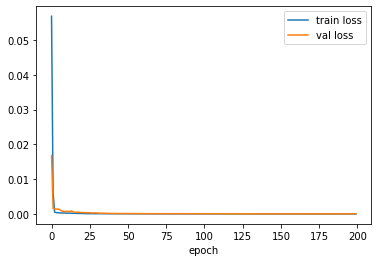

In [28]:
"""Plot training loss curve and save as image"""
loss_img_file_name = "train_loss.png"
x_epochs = range(epochs)
fig, ax = plt.subplots()
ax.plot(x_epochs, train_loss, label="train loss")
ax.plot(val_epochs, val_loss, label="val loss")
leg = ax.legend()
#plt.title()
plt.xlabel("epoch")
#plt.ylabel("loss")
plt.savefig(loss_img_file_name)
plt.show()
plt.close()
train_loss_txt_file_name = "train_loss.txt"
np.savetxt(train_loss_txt_file_name, train_loss)
val_loss_txt_file_name = "val_loss.txt"
np.savetxt(val_loss_txt_file_name, val_loss)

In [29]:
val_labels = np.fromfile(val_label_paths[-1], sep=" ")
val_pred = np.fromfile(val_pred_paths[-1], sep=" ")

In [30]:
val_labels.shape

(43200,)

In [31]:
val_pred.shape

(43200,)

In [32]:
"""Print MSE"""
print(np.array(val_labels).shape)
print(np.array(val_pred).shape)
#val_df = pd.DataFrame([val_labels,val_pred].T)
val_df = pd.DataFrame(np.array([val_labels,val_pred]).T)
val_df

(43200,)
(43200,)


,0,1
0,0.432313,0.426642
1,0.500000,0.497968
2,0.445148,0.445307
3,0.600000,0.592127
4,0.385747,0.393089
...,...,...
43195,0.200000,0.207774
43196,0.331103,0.343130
43197,0.200000,0.205513
43198,0.362181,0.363318


In [33]:
val_df_columns = []
for target_name in target_names:
    val_df_columns.append(f"label_{target_attributes}")
for target_name in target_names:
    val_df_columns.append(f"pred_{target_name}")

val_df.columns = ["label", "pred"]
val_df["dev"] = abs(val_df["label"] - val_df["pred"]) 
#val_df["mse"] = (val_df["label"] - val_df["pred"])**2
val_df.head(20)

NameError: name 'target_names' is not defined

In [ ]:
val_df.describe()

In [ ]:
"""
Load Test Data
"""
net.eval()
print(f"test dataset size: {len(test_indices)}")

input_size = net.get_input_size()
output_size = net.get_output_size()
model_input_shape = tuple(np.concatenate(([-1],input_size)))
print(model_input_shape)

#net_outputs = np.zeros( (len(test_indices)) )
net_outputs = np.zeros( (len(test_indices), len(output_attributes)) )
#labels = np.zeros( (len(test_indices)) )
labels = np.zeros( (len(test_indices), len(output_attributes)) )
mus = np.zeros( (len(test_indices)) )

for i in tqdm(range(len(test_indices))):
#for i in tqdm(range(len(val_indices))):
    
    test_index = test_indices[i]
    conf_lat_links, label = dataset.get_conf(test_index)
    mus[i] = dataset.data[test_index]["mu"].detach().cpu().numpy()
    net_outputs[i] = net(conf_lat_links.view(model_input_shape).to(device).float()).detach().cpu().numpy()
    #output = net(conf_lat_links.view(model_input_shape).float())
    labels[i] = label.detach().cpu().numpy()
    
    

In [ ]:
unique_mus = np.unique(mus)
num_mus = len(unique_mus)

##save the observable values in a dictionary
obs_mu_dict = {}
for target_name in target_attributes:
    obs_mu_dict[target_name] = {"label" : [],"pred" : []}

In [ ]:
obs_label = []
obs_pred = []
for mu_val in unique_mus:
    mu_loc = np.where(mus == mu_val)[0]
    obs_label_mu = np.array(labels[mu_loc,0])
    obs_pred_mu = np.array(net_outputs[mu_loc,0])
    
    obs_label.append(obs_label_mu)    
    obs_pred.append(obs_pred_mu)
    

In [ ]:
##to be able to plot the observables against mu, they have to be sorted with respect to it
for mu_val in unique_mus:
    ##find which examples have a particular mu value (mu_val)
    mu_loc = np.where(mus == mu_val)[0]
    ##find the labels and prediction of observables which correspond to these examples
    obs_label_mu_val = labels[mu_loc]
    obs_pred_mu_val = net_outputs[mu_loc]
    for target_i, target_name in enumerate(target_attributes):
        
        obs_label_mu = np.array(labels[mu_loc,target_i])
        obs_pred_mu = np.array(net_outputs[mu_loc,target_i])
        
        obs_mu_dict[target_name]["label"].append(obs_label_mu)
        obs_mu_dict[target_name]["pred"].append(obs_pred_mu)

        
        
        
for target_i, target_name in enumerate(target_attributes):
    obs_mu_dict[target_name]["label"] = np.array(obs_mu_dict[target_name]["label"])
    obs_mu_dict[target_name]["pred"] = np.array(obs_mu_dict[target_name]["pred"])

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "phi2"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="ϕ² label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="ϕ² prediction")
plt.legend(loc="upper left")
plt.savefig("phi2_mu")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "n"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="n label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="n prediction")
plt.legend(loc="upper left")
#plt.savefig("phi2_mu")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 0

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("ϕ² label")
plt.ylabel("ϕ² predicted")
plt.legend(loc="upper left")
#plt.show()
#plt.savefig("phi2_label_pred") 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 1

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("n label")
plt.ylabel("n predicted")
plt.legend(loc="upper left")
#plt.show()
#plt.savefig("n_label_pred") 